In [35]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm

# Ensure the appropriate backend for Matplotlib based on your OS
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

# Import custom modules
import sys
sys.path.append(os.path.join(sys.path[0], '..'))
from metrics import evaluation_metrics
from metrics import cls_feature_class

# Constants
HOP_LENGTH_SECONDS = 0.02
BASELINE = "output"
DATE_ = '2023-09-28_22-26-44'

# Define the class dictionary
class_dict = {
    'crane': 0,
    'piledriver': 1,
    'saw': 2,
    'excavator': 3,
    'pneumaticbreaker': 4,
    'concretepumper': 5,
    'forklift': 6
}

# Function to collect classwise data
def collect_classwise_data(input_dict):
    output_dict = {}
    for key, values in input_dict.items():
        for seld in values:
            class_name = seld[0]
            if class_name not in output_dict:
                output_dict[class_name] = []
            output_dict[class_name].append([key, class_name, seld[1], seld[2]])
    return output_dict

# Function to plot data
def plot_data(plot_data, hop_length_seconds, index, x_length, class_dict, plot_x_axis=False):
    color_map = ['b', 'r', 'g', 'y', 'k', 'c', 'm']
    for class_index, data_points in plot_data.items():
        print(class_index, data_points)
        time_axis = np.array(data_points)[:, 0] * hop_length_seconds
        y_axis = np.array(data_points)[:, index]
        label = list(class_dict.keys())[list(class_dict.values()).index(class_index)]
        plt.plot(time_axis, y_axis, marker='.', color=color_map[class_index], linestyle='None', markersize=4, label=label)
    plt.grid()
    plt.xlim([-0.2, x_length])
    if not plot_x_axis:
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

def main(DATE, x_length):
    pred_dir = DATE
    aud_dir = f'{BASELINE}/audio/{DATE_}/'

    # Get all the CSV files in the predicted directory
    predicted_files = [os.path.join(pred_dir, f) for f in os.listdir(pred_dir) if f.endswith('.csv')]
    print(predicted_files[2])

    pred =  predicted_files[2]

    x_length = x_length

    pred_dict = evaluation_metrics.load_output_format_file(pred)
    pred_data = collect_classwise_data(pred_dict)

    # Load the reference output format
    feat_cls = cls_feature_class.FeatureClass()
    num_classes = len(feat_cls.get_classes())

    # Load the audio and extract the spectrogram
    pred_filename = os.path.basename(pred)
    audio, fs = feat_cls._load_audio(os.path.join(aud_dir, pred_filename.split('.')[0]) + '.wav')
    stft = np.abs(np.squeeze(feat_cls._spectrogram(audio[:, :1])))
    stft = librosa.amplitude_to_db(stft, ref=np.max)

    fig1 = plt.figure(figsize=(15, 10), constrained_layout=True)
    gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fig1)
    plot_data(pred_data, HOP_LENGTH_SECONDS, index=2, x_length=x_length, class_dict=class_dict)
    plt.ylim([-10, num_classes + 370])
    plt.title('DOA Estimation')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

    # Save the figure to a file in the "figures" directory
    fig1.savefig(os.path.join(pred_dir, pred_filename.split('.')[0]))


In [36]:
import wave, os, glob
folder_list = []
path = 'output/meta_plot/*/'

for folder in glob.glob(path):
    if os.path.isdir(folder):
        folder_list.append(folder)


In [37]:
# Sort the folder_paths list by creation time in descending order
folder_list.sort(key=lambda x: os.path.getctime(x), reverse=True)
print(folder_list)

last_created_folder = folder_list[0]

x_length = 11.5

['output/meta_plot/2023-10-01_15-21-32/', 'output/meta_plot/2023-10-01_14-53-06/', 'output/meta_plot/2023-10-01_14-38-56/', 'output/meta_plot/2023-10-01_14-19-42/', 'output/meta_plot/2023-10-01_13-50-46/', 'output/meta_plot/2023-10-01_01-12-15/', 'output/meta_plot/2023-10-01_01-10-08/', 'output/meta_plot/2023-10-01_00-45-58/', 'output/meta_plot/2023-10-01_00-43-37/', 'output/meta_plot/2023-10-01_00-37-11/', 'output/meta_plot/2023-09-30_23-44-40/', 'output/meta_plot/2023-09-30_23-41-33/', 'output/meta_plot/2023-09-29_01-22-49/', 'output/meta_plot/2023-09-28_23-11-27/', 'output/meta_plot/2023-09-28_23-07-39/', 'output/meta_plot/2023-09-28_22-59-31/']


output/meta_plot/2023-10-01_15-21-32/split5_ID.csv
3 [[0, 3, 80, 30], [1, 3, 80, 30], [2, 3, 80, 30], [3, 3, 80, 30], [4, 3, 80, 30], [5, 3, 80, 30], [6, 3, 80, 30], [7, 3, 80, 30], [8, 3, 80, 30], [9, 3, 80, 30], [10, 3, 80, 30], [11, 3, 80, 30], [12, 3, 80, 30], [13, 3, 80, 30], [14, 3, 80, 30], [15, 3, 80, 30], [16, 3, 80, 30], [17, 3, 80, 30], [18, 3, 80, 30], [19, 3, 80, 30], [20, 3, 80, 30], [21, 3, 80, 30], [22, 3, 80, 30], [23, 3, 80, 30], [24, 3, 80, 30], [25, 3, 80, 30], [26, 3, 80, 30], [27, 3, 80, 30], [28, 3, 80, 30], [29, 3, 80, 30], [30, 3, 80, 30], [31, 3, 80, 30], [32, 3, 80, 30], [33, 3, 80, 30], [34, 3, 80, 30], [35, 3, 80, 30], [36, 3, 80, 30], [37, 3, 80, 30], [38, 3, 80, 30], [39, 3, 80, 30], [40, 3, 80, 30], [41, 3, 80, 30], [42, 3, 80, 30], [43, 3, 80, 30], [44, 3, 80, 30], [45, 3, 80, 30], [46, 3, 80, 30], [47, 3, 80, 30], [48, 3, 70, 30], [49, 3, 70, 30], [50, 3, 70, 30], [51, 3, 70, 30], [52, 3, 70, 30], [53, 3, 70, 30], [54, 3, 70, 30], [55, 3, 70, 30], [56,

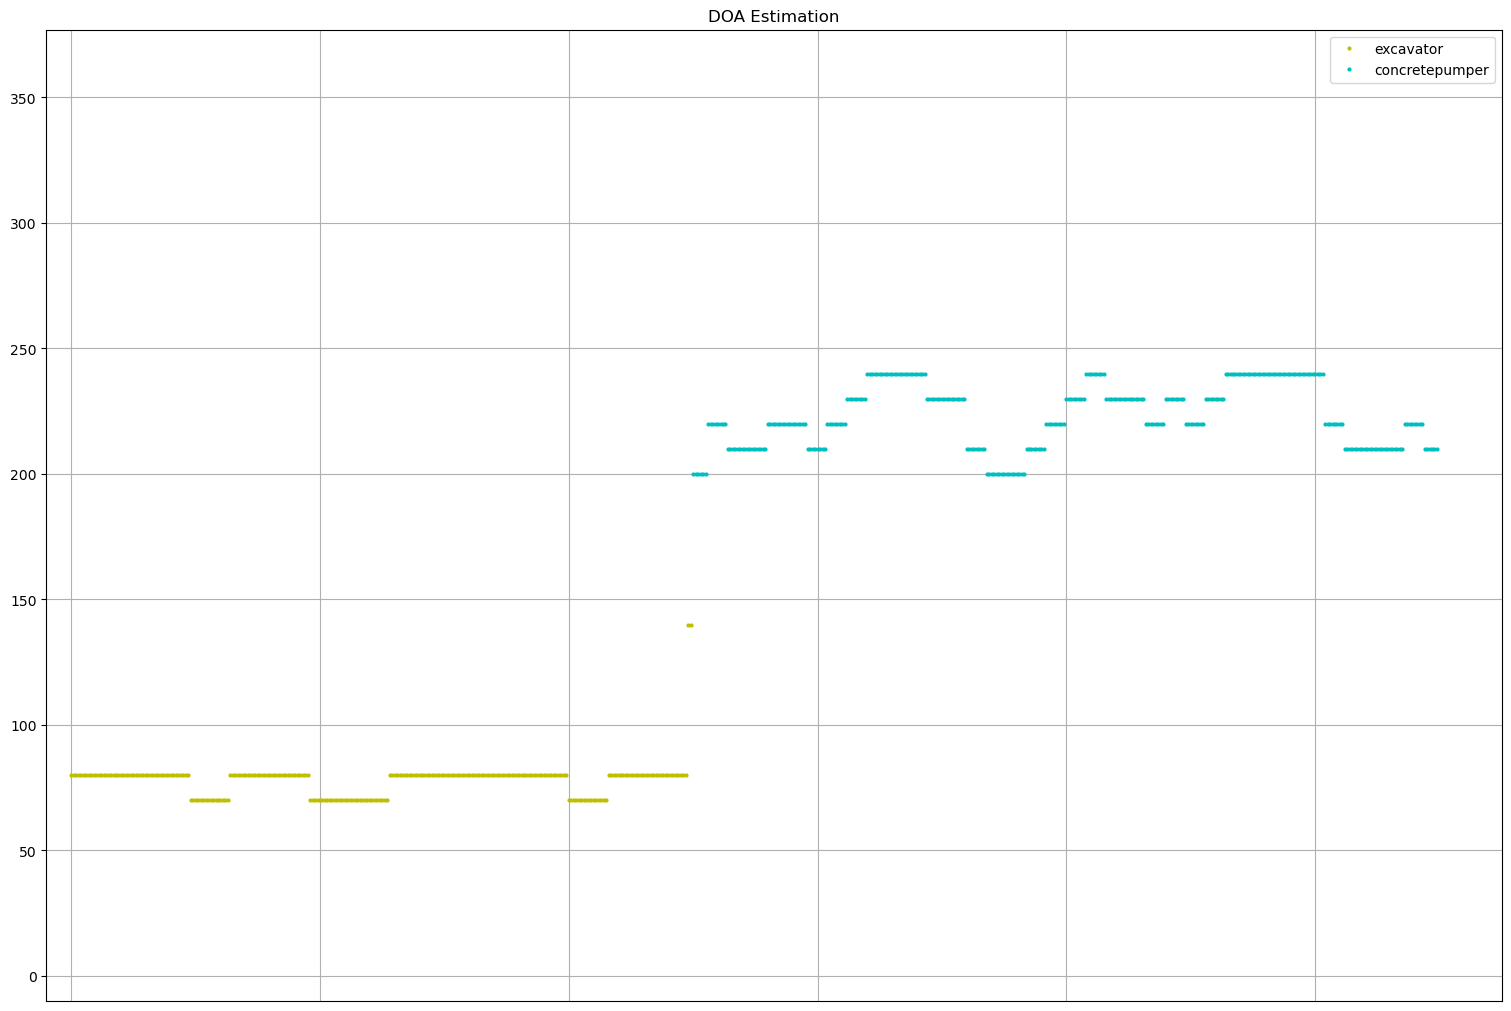

In [47]:
if __name__ == "__main__":
    main(last_created_folder, x_length)

[0.000e+00 5.000e-03 1.000e-02 ... 5.745e+00 5.750e+00 5.755e+00]


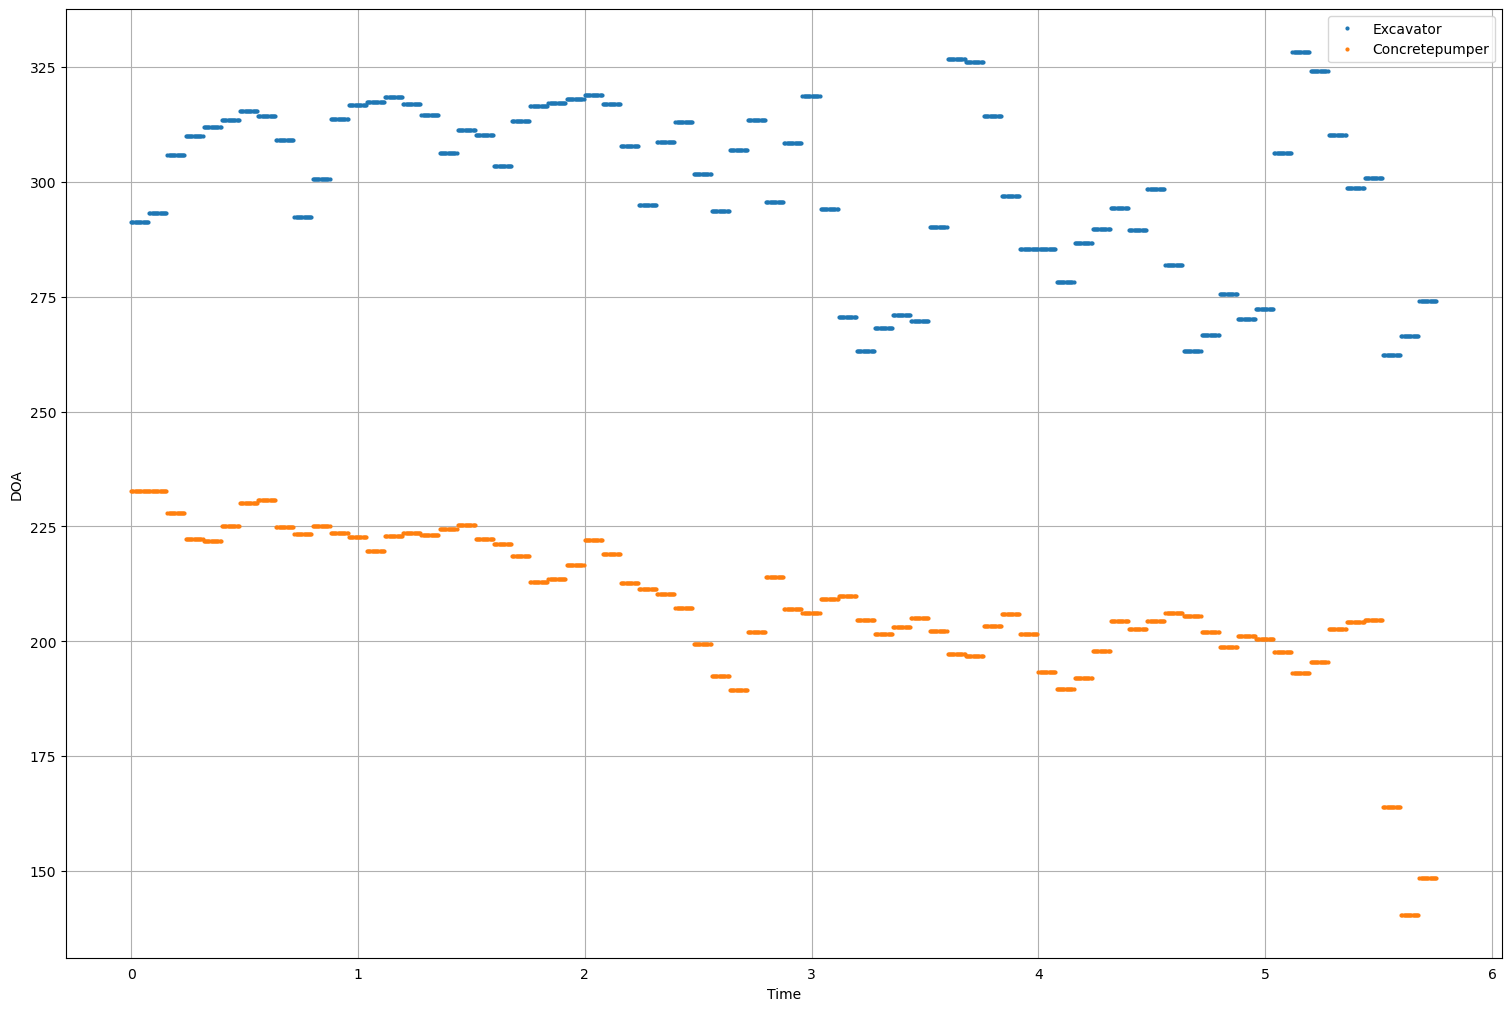

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('output/meta_plot/2023-10-01_15-21-32/split3_ID9_5_vs_3_doas.csv', header=None)

for f in os.listdir(last_created_folder):
    pred_filename = f

# Define the class dictionary
class_dict = {
    0: 'Crane', 
    1: 'Piledriver', 
    2: 'Saw', 
    3: 'Excavator', 
    4: 'Pneumaticbreaker', 
    5: 'Concretepumper', 
    6: 'Forklift'
}

# Specify which two columns to plot (e.g., columns 0 and 1)
column1 = 0
column2 = 1

# Create a time variable (assuming time increments by 1 for each data point)
time = np.arange(df.shape[0])

time_axis = time * 0.005

print(time_axis)

fig1 = plt.figure(figsize=(15, 10), constrained_layout=True)
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fig1)

# Create a line plot for the selected columns
plt.plot(time_axis, df[column1], marker='.', label=class_dict[3], linestyle='None', markersize=4)
plt.plot(time_axis, df[column2], marker='.', label=class_dict[5], linestyle='None', markersize=4)
plt.grid()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('DOA')
plt.legend()

# Show the plot
plt.show()

# Save the figure to a file in the "figures" directory
fig1.savefig(os.path.join(last_created_folder, pred_filename.split('.')[0]))
